# MNIST CNN 

###  *a handwritten single digit recognizer*

In [ ]:
import tensorflow as tf
print(tf.__version__)

## CNN architecture
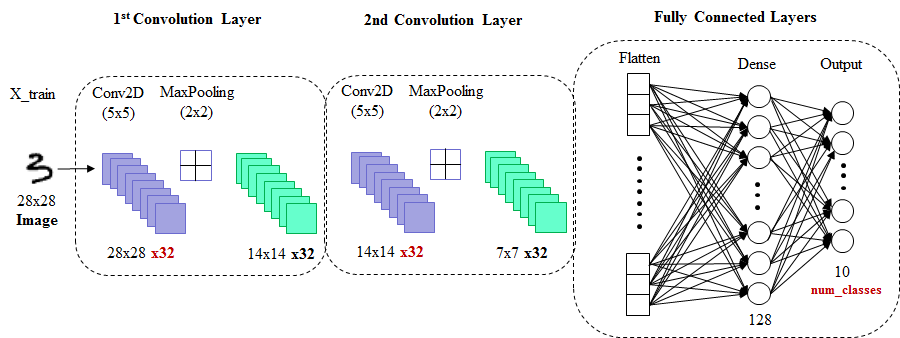

In [ ]:
# Import Libraries
import numpy as np

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

import matplotlib.pyplot as plt

## Dataset

In [ ]:
# Load Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print(x_train.shape)

In [ ]:
# Show image of training data
plt.figure(figsize = (10, 10)) # set size of figure 10x10
rand_indexes = np.random.randint(0, x_train.shape[0], 8) # select 8 digits(0~9) randomly 
print(rand_indexes)
for index,im_index in enumerate(rand_indexes):
    plt.subplot(4, 4, index+1)
    plt.imshow(x_train[im_index], cmap = 'gray', interpolation = 'none')
    plt.title('Class %d' % y_train[im_index])
plt.tight_layout()

In [ ]:
# data convert to floating point
#x_train = x_train.astype('float32') / 255
x_train = x_train / 255.0
#x_test = x_test.astype('float32') / 255
x_test = x_test / 255.0
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

In [ ]:
print(x_test.shape)

In [ ]:
img_rows, img_cols = 28, 28 # input image dimensions

if keras.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [ ]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
num_classes = y_train.shape[1]

In [ ]:
print(y_train.shape)
print(y_test.shape)
print(num_classes)

## Build Model

In [ ]:
# Build Model
model = Sequential()
# 1st Conv layer
model.add(Conv2D(32, kernel_size = (3, 3), padding = 'same', activation = 'relu', input_shape = input_shape))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
# 2nd Conv layer        
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
# Fully Connected layer        
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation = 'softmax'))

model.summary()

In [ ]:
# Compile Model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

## Train Model

In [ ]:
# Train Model
num_epochs = 20
history = model.fit(x_train, y_train, batch_size = 512, epochs = num_epochs, verbose = 1);

In [ ]:
# Save Model
model.save('mnist_cnn.h5')

## Evaluate Model

In [ ]:
# Evaluate Model
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

## Training History

In [ ]:
# Show Train History
keys=history.history.keys()
print(keys)

def show_train_history(hisData,train,test): 
    plt.plot(hisData.history[train])
    plt.plot(hisData.history[test])
    plt.title('Training History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

show_train_history(history, 'loss', 'val_loss')
show_train_history(history, 'accuracy', 'val_accuracy')

## Exercises to improve accuracy
### 1. change Conv kernel_size from 5x5 to 3x3 (smaller filter)
### 2. double Conv in Conv layer  (add another Conv2D after Conv2D)
### 3. add 3rd Conv layer (128)
### 4. double FC layers (add Dense(64))
### 5. smaller batch_size
### 6. train MORE epochs